# blackfriday Dataset and feature engineering


In [ ]:
import pandas as pd

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
bf=pd.read_csv('btrain.csv')

In [ ]:
bf.head()

In [5]:
tf=pd.read_csv('btest.csv')

In [6]:
tf.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN


In [7]:
df=bf.append(tf)

C:\Users\Ask\AppData\Local\Temp\ipykernel_6616\1563149151.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=bf.append(tf)


In [8]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
df.drop(['User_ID'],axis=1,inplace=True)

In [12]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [13]:
pd.get_dummies(df['Gender']) #finding a direct way in dataset not deleting and adding again and again

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


In [14]:
df['Gender']=df['Gender'].map({'F':0, 'M':1}) #for female =0 and for male=1

In [15]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [16]:
#handle categorical feature age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [17]:
df['Age']=df['Age'].map({'0-17':1, '18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [18]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [19]:
df_City=pd.get_dummies(df['City_Category'],drop_first=True)

In [20]:
df_City

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [21]:
df=pd.concat([df,df_City],axis=1)

In [22]:
df.drop('City_Category',axis=1, inplace=True)

In [23]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,1


In [24]:
#missing values checking

In [25]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [26]:
df['Product_Category_2'].mode()[0]

8.0

In [27]:
#repace the missing values with mode not with the mean because mean will create new category
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])


In [28]:
df['Product_Category_2'].isnull().sum()

0

In [29]:
df['Product_Category_3'].mode()[0]

16.0

In [30]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])


In [31]:
df['Product_Category_3'].isnull().sum()

0

In [32]:
df.shape

(783667, 12)

In [33]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [34]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\Ask\AppData\Local\Temp\ipykernel_6616\2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [35]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [36]:
df.describe()

,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
count,783667.00000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,550068.000000,783667.000000,783667.000000
mean,0.75291,3.496802,8.079300,0.409777,5.366196,9.265541,14.988858,9263.968713,0.420764,0.310954
std,0.43132,1.352736,6.522206,0.491793,3.878160,4.301427,2.740792,5023.065394,0.493682,0.462884
min,0.00000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000
25%,1.00000,3.000000,2.000000,0.000000,1.000000,8.000000,16.000000,5823.000000,0.000000,0.000000
50%,1.00000,3.000000,7.000000,0.000000,5.000000,8.000000,16.000000,8047.000000,0.000000,0.000000
75%,1.00000,4.000000,14.000000,1.000000,8.000000,14.000000,16.000000,12054.000000,1.000000,1.000000
max,1.00000,7.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000


In [37]:
df.head(10)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
5,P00193542,1,3,15,3,0,1,2.0,16.0,15227.0,0,0
6,P00184942,1,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,P00346142,1,5,7,2,1,1,15.0,16.0,15854.0,1,0
8,P0097242,1,5,7,2,1,1,16.0,16.0,15686.0,1,0
9,P00274942,1,3,20,1,1,8,8.0,16.0,7871.0,0,0


In [38]:
df.shape

(783667, 12)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [40]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [42]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [45]:
##visualization of age vs Purchase and rest of the category


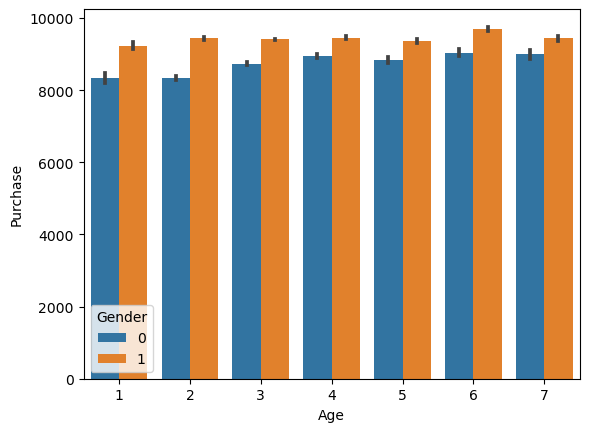

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the arguments are passed as keywords
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

# Display the plot
plt.show()


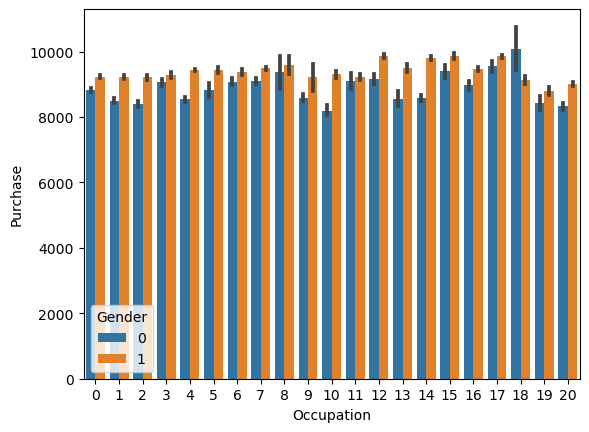

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the arguments are passed as keywords
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

# Display the plot
plt.show()


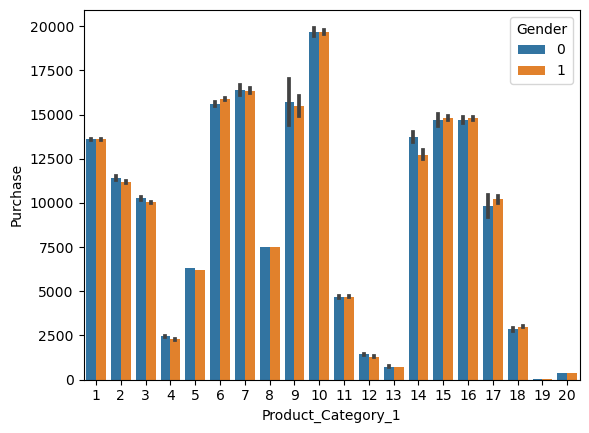

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the arguments are passed as keywords
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

# Display the plot
plt.show()


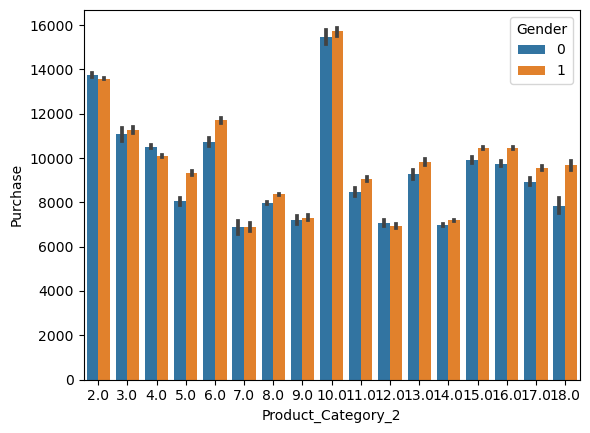

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the arguments are passed as keywords
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

# Display the plot
plt.show()


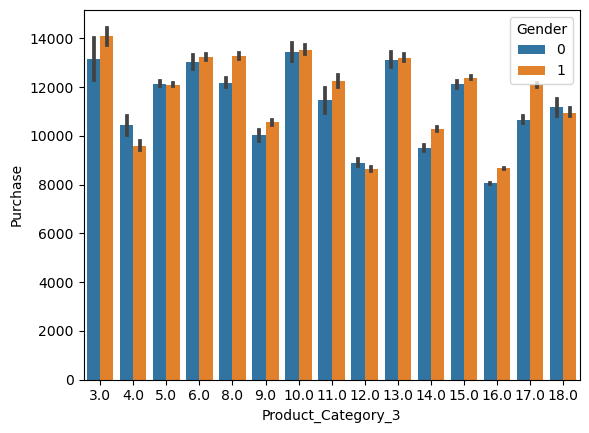

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the arguments are passed as keywords
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)

# Display the plot
plt.show()


In [62]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [63]:
##feature scaling

In [64]:
bf=df[df['Purchase'].isnull()]

In [65]:
tf=df[df['Purchase'].isnull()]

In [105]:
X=tf.drop('Purchase', axis=1)

In [106]:
X


,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,16.0,1,0
233595,P00254642,0,3,15,4,1,5,8.0,16.0,1,0
233596,P00031842,0,3,15,4,1,1,5.0,12.0,1,0
233597,P00124742,0,5,1,4,0,10,16.0,16.0,0,1


In [107]:
X.shape

(233599, 11)

In [108]:
y=tf['Purchase']

In [109]:
y.shape

(233599,)

In [110]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [116]:
X_train.drop('Product_ID',axis=1, inplace=True)

In [117]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [119]:
X_train=sc.fit_transform(X_train)

In [121]:
X_test.drop('Product_ID', axis=1,inplace=True)

In [122]:
X_test=sc.transform(X_test)

In [123]:
# now you can train your model here 

In [141]:
#l=LinearRegression()